In [19]:
msg = "welcome to notebook on vscode"
print(msg)

welcome to notebook on vscode


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyEDM
import pyEDM as edm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer

In [40]:
'''
Binary prediction skill (“bloom” or “no bloom”) is
evaluated by how well bloom predictions (5% largest predicted values)
correspond to bloom observations (5%largest observed values)
Input: Series of observed chlorophyll-a, series of predicted chlorophyll-1
Output: Arrray containing [Accuracy, True Positive Rate, False Positive Rate, True Negative Rate, False Negative Rate]
'''
def bloom_binary_prediction(obs,pred,threshold=8.03199999999999):
    #obs_bloom_95 = np.percentile(obs, 95) #incorrect
    #pred_bloom_95 = np.percentile(pred, 95) #incorrect
    obs_blooms = obs > threshold
    pred_blooms = pred > threshold
    Accuracy = 1 - (obs_blooms ^ pred_blooms).mean()
    True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
    False_pos = ((~obs_blooms) & pred_blooms).sum() / (~obs_blooms).sum()
    True_neg = ((~obs_blooms) & (~pred_blooms)).sum() / (~obs_blooms).sum()
    False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
    
    return [Accuracy, True_pos, False_pos, True_neg, False_neg]
# Function to apply transformations
def transform_data(obs, pred, transform_type="none"):
    if transform_type == "none":
        return obs, pred
    elif transform_type == "minmax":
        scaler = MinMaxScaler()
        return scaler.fit_transform(obs.reshape(-1, 1)).flatten(), scaler.transform(pred.reshape(-1, 1)).flatten()
    elif transform_type == "standard":
        scaler = StandardScaler()
        return scaler.fit_transform(obs.reshape(-1, 1)).flatten(), scaler.transform(pred.reshape(-1, 1)).flatten()
    elif transform_type == "quantile":
        transformer = QuantileTransformer()
        return transformer.fit_transform(obs.reshape(-1, 1)).flatten(), transformer.transform(pred.reshape(-1, 1)).flatten()
    else:
        raise ValueError(f"Unknown transformation type: {transform_type}")

# New function to evaluate performance based on threshold and transformation
def evaluate_performance(obs, pred, threshold=8.032, transform="none"):
    # Apply transformation to the data
    transformed_obs, transformed_pred = transform_data(obs, pred, transform)
    
    # Evaluate using bloom_binary_prediction
    result = bloom_binary_prediction(transformed_obs, transformed_pred, threshold)
    return result

# Example function to process results for logging or further analysis
def process_results(results, threshold, transform):
    print(f"Processed Results for Threshold {threshold} and Transform {transform}:")
    for result in results:
        print(f"Accuracy: {result[0]}, True Positive Rate: {result[1]}, False Positive Rate: {result[2]}")
        print(f"True Negative Rate: {result[3]}, False Negative Rate: {result[4]}")

# Training and evaluation function with flexible passing of parameters
def train_evaluate_model(obs, pred, thresholds=[8.03199999999999, 7.5, 8.5], transforms=["none", "minmax", "standard"]):
    all_results = []
    for threshold in thresholds:
        for transform in transforms:
            # Evaluate performance
            result = evaluate_performance(obs, pred, threshold, transform)
            all_results.append((threshold, transform, result))
            
            # Process and print results
            process_results([result], threshold, transform)
    
    return all_results

# Example observed and predicted data
obs = np.random.rand(100) * 10  # Example observed chlorophyll-a values
pred = np.random.rand(100) * 10  # Example predicted chlorophyll-a values

# Train and evaluate the model
evaluation_results = train_evaluate_model(obs, pred)

Processed Results for Threshold 8.03199999999999 and Transform none:
Accuracy: 0.6599999999999999, True Positive Rate: 0.0, False Positive Rate: 0.20481927710843373
True Negative Rate: 0.7951807228915663, False Negative Rate: 1.0
Processed Results for Threshold 8.03199999999999 and Transform minmax:
Accuracy: 1.0, True Positive Rate: nan, False Positive Rate: 0.0
True Negative Rate: 1.0, False Negative Rate: nan
Processed Results for Threshold 8.03199999999999 and Transform standard:
Accuracy: 1.0, True Positive Rate: nan, False Positive Rate: 0.0
True Negative Rate: 1.0, False Negative Rate: nan
Processed Results for Threshold 7.5 and Transform none:
Accuracy: 0.6, True Positive Rate: 0.047619047619047616, False Positive Rate: 0.25316455696202533
True Negative Rate: 0.7468354430379747, False Negative Rate: 0.9523809523809523
Processed Results for Threshold 7.5 and Transform minmax:
Accuracy: 1.0, True Positive Rate: nan, False Positive Rate: 0.0
True Negative Rate: 1.0, False Negative

C:\Users\05ani\AppData\Local\Temp\ipykernel_21456\1123969903.py:14: RuntimeWarning: invalid value encountered in scalar divide
  True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
C:\Users\05ani\AppData\Local\Temp\ipykernel_21456\1123969903.py:17: RuntimeWarning: invalid value encountered in scalar divide
  False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
C:\Users\05ani\AppData\Local\Temp\ipykernel_21456\1123969903.py:14: RuntimeWarning: invalid value encountered in scalar divide
  True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
C:\Users\05ani\AppData\Local\Temp\ipykernel_21456\1123969903.py:17: RuntimeWarning: invalid value encountered in scalar divide
  False_neg = (obs_blooms & (~pred_blooms)).sum() / obs_blooms.sum()
C:\Users\05ani\AppData\Local\Temp\ipykernel_21456\1123969903.py:14: RuntimeWarning: invalid value encountered in scalar divide
  True_pos = (obs_blooms & pred_blooms).sum() / obs_blooms.sum()
C:\Users\05ani\AppData\Local\Tem

In [22]:
paper_data = pd.read_csv('Data/cleaned_data.csv')
paper_data = paper_data.set_index('time (UTC)')
paper_data['Time'] = paper_data.index.astype(int)
print(paper_data)
#np.percentile(paper_data['Avg_Chloro'].dropna(), 95)

            Avg_Chloro  Nitrate  Phosphate  Silicate  Nitrite  SURF_TEMP_C  \
time (UTC)                                                                   
0.0               1.82     0.43       0.24       5.6     0.03         20.3   
7.0               2.71     0.83       0.37       5.1     0.04         17.8   
13.0              0.99     0.45       0.24       3.5     0.00         22.2   
20.0              1.23     0.34       0.17       4.2     0.00         19.8   
28.0              2.41     0.29       0.12       3.8     0.00         22.5   
...                ...      ...        ...       ...      ...          ...   
5789.0            3.22     0.85       0.30       6.2     0.00         17.4   
5796.0            3.39     0.45       0.25       4.9     0.00         17.9   
5803.0            7.82     0.00       0.17       5.2     0.00         18.3   
5811.0           17.30     0.00       0.20       9.4     0.00         18.0   
5817.0           16.71     0.00       0.10       7.5     0.00   

In [23]:
time_series = paper_data[['Time', 'Nitrate', 'Phosphate', 'Silicate',  'Nitrite', 'AVG_TEMP_C', 'AVG_SAL_PSU', 'AVG_DENS_kgm3', 'Avg_Chloro']]
print(time_series)

            Time  Nitrate  Phosphate  Silicate  Nitrite  AVG_TEMP_C  \
time (UTC)                                                            
0.0            0     0.43       0.24       5.6     0.03       18.10   
7.0            7     0.83       0.37       5.1     0.04       17.35   
13.0          13     0.45       0.24       3.5     0.00       20.25   
20.0          20     0.34       0.17       4.2     0.00        9.90   
28.0          28     0.29       0.12       3.8     0.00       11.25   
...          ...      ...        ...       ...      ...         ...   
5789.0      5789     0.85       0.30       6.2     0.00       17.40   
5796.0      5796     0.45       0.25       4.9     0.00       17.90   
5803.0      5803     0.00       0.17       5.2     0.00       17.35   
5811.0      5811     0.00       0.20       9.4     0.00       17.70   
5817.0      5817     0.00       0.10       7.5     0.00       17.80   

            AVG_SAL_PSU  AVG_DENS_kgm3  Avg_Chloro  
time (UTC)             

In [24]:
embedded = edm.Embed(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    E = 3,
    tau=-1
)
embedded

,Nitrate(t-0),Phosphate(t-0),Silicate(t-0),Nitrite(t-0),AVG_TEMP_C(t-0),AVG_SAL_PSU(t-0),AVG_DENS_kgm3(t-0),Avg_Chloro(t-0),Nitrate(t-1),Phosphate(t-1),...,AVG_DENS_kgm3(t-1),Avg_Chloro(t-1),Nitrate(t-2),Phosphate(t-2),Silicate(t-2),Nitrite(t-2),AVG_TEMP_C(t-2),AVG_SAL_PSU(t-2),AVG_DENS_kgm3(t-2),Avg_Chloro(t-2)
time (UTC),,,,,,,,,,,,,,,,,,,,,
0.0,0.43,0.24,5.6,0.03,18.10,33.695,1024.129374,1.82,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,0.83,0.37,5.1,0.04,17.35,33.640,1024.289049,2.71,0.43,0.24,...,1024.129374,1.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.0,0.45,0.24,3.5,0.00,20.25,33.660,1023.563298,0.99,0.83,0.37,...,1024.289049,2.71,0.43,0.24,5.6,0.03,18.10,33.695,1024.129374,1.82
20.0,0.34,0.17,4.2,0.00,9.90,33.650,1023.740812,1.23,0.45,0.24,...,1023.563298,0.99,0.83,0.37,5.1,0.04,17.35,33.640,1024.289049,2.71
28.0,0.29,0.12,3.8,0.00,11.25,33.710,1023.004896,2.41,0.34,0.17,...,1023.740812,1.23,0.45,0.24,3.5,0.00,20.25,33.660,1023.563298,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5789.0,0.85,0.30,6.2,0.00,17.40,33.470,1024.149572,3.22,0.99,0.22,...,1023.990298,4.03,1.00,0.28,6.3,0.00,16.85,33.330,1024.172867,4.10
5796.0,0.45,0.25,4.9,0.00,17.90,33.475,1024.033476,3.39,0.85,0.30,...,1024.149572,3.22,0.99,0.22,8.1,0.00,17.75,33.370,1023.990298,4.03
5803.0,0.00,0.17,5.2,0.00,17.35,33.545,1024.214172,7.82,0.45,0.25,...,1024.033476,3.39,0.85,0.30,6.2,0.00,17.40,33.470,1024.149572,3.22


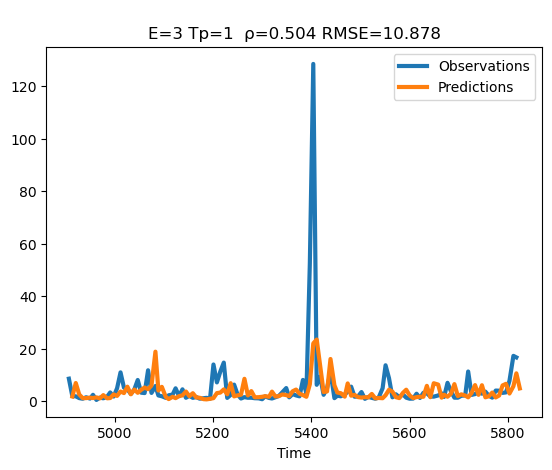

       Time  Observations  Predictions  Pred_Variance
0    4907.0          8.61          NaN            NaN
1    4914.0          1.97     1.834100       0.267110
2    4921.0          1.90     6.964844      37.903739
3    4928.0          1.22     2.599253       2.588172
4    4935.0          0.98     1.218376       0.123333
..      ...           ...          ...            ...
127  5796.0          3.39     6.658429      35.765845
128  5803.0          7.82     2.965545       3.115841
129  5811.0         17.30     5.734473       5.471602
130  5817.0         16.71    10.647297      43.317119
131  5824.0           NaN     4.918202       8.396710

[132 rows x 4 columns]


In [25]:
result = edm.Simplex(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 3,
    showPlot = True
)
print(result)

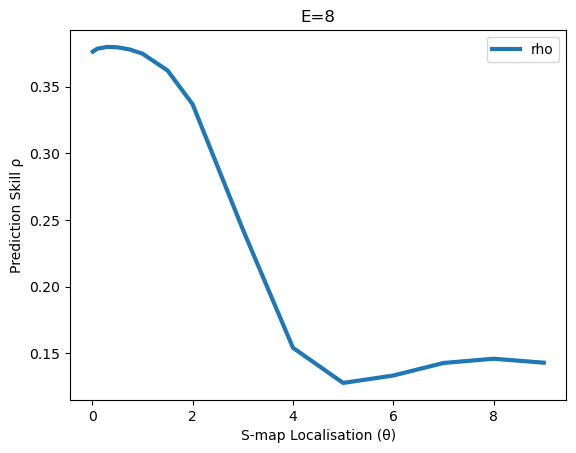

,theta,rho
0,0.01,0.376319
1,0.10,0.378522
2,0.30,0.379841
3,0.50,0.379567
4,0.75,0.377887
5,1.00,0.374774
6,1.50,0.362168
7,2.00,0.336801
8,3.00,0.243017
9,4.00,0.154194


In [26]:
edm.PredictNonlinear( dataFrame = time_series, lib = '1 701', pred = '702 832',
                  columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro', target = 'Avg_Chloro', E = 3, embedded=True )

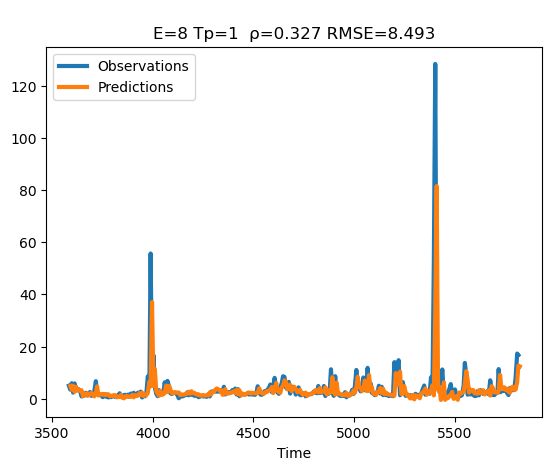

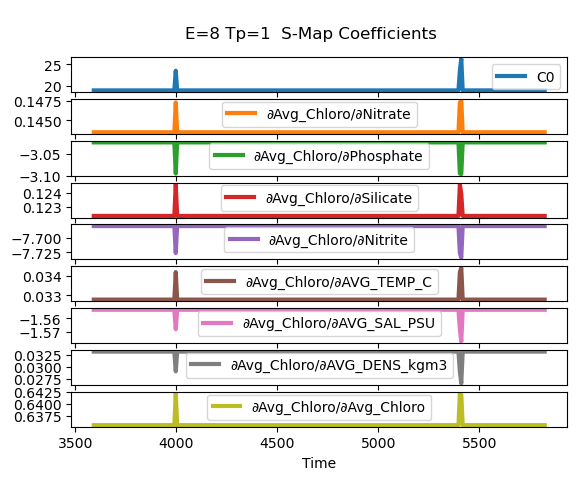

{'predictions':        Time  Observations  Predictions  Pred_Variance
0    3584.0          4.96          NaN            NaN
1    3591.0          3.47     4.863042      19.340112
2    3598.0          5.91     3.447474      14.402629
3    3605.0          2.32     4.962083      19.835571
4    3612.0          5.84     2.633197      13.378153
..      ...           ...          ...            ...
316  5796.0          3.39     3.387067      14.281089
317  5803.0          7.82     3.434555      14.376022
318  5811.0         17.30     6.343084      28.788105
319  5817.0         16.71    12.677545     118.725414
320  5824.0           NaN    12.374844     112.601802

[321 rows x 4 columns], 'coefficients':        Time         C0  ∂Avg_Chloro/∂Nitrate  ∂Avg_Chloro/∂Phosphate  \
0    3584.0        NaN                   NaN                     NaN   
1    3591.0  18.853819              0.143497               -3.022959   
2    3598.0  18.853819              0.143497               -3.022959   
3    36

Time             5698.000000
Nitrate             0.780000
Phosphate           0.290000
Silicate            2.400000
Nitrite             0.000000
AVG_TEMP_C         15.650000
AVG_SAL_PSU        33.015000
AVG_DENS_kgm3    1024.204592
Avg_Chloro          1.370000
Name: 5698.0, dtype: float64

In [27]:
#Using embeddings 
#multiview embedding hao ye and sugihara (around 2015)
#t
'''
result = edm.SMap(
    dataFrame = embedded, 
    columns = 'Nitrate(t-0) Phosphate(t-0) Silicate(t-0) Nitrite(t-0) AVG_TEMP_C(t-0) AVG_SAL_PSU(t-0) AVG_DENS_kgm3(t-0) Avg_Chloro(t-0)',
    target = 'Avg_Chloro(t-0)',
    lib = '1 701',  # Library from rows 0 to 700
    pred = '702 832',
    E = 8,
    theta=2,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]
'''


result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 512',  # Library from rows 0 to 700
    pred = '513 832',
    E = 8,
    theta=0,
    tau = -3,
    showPlot = True,
    embedded=True,
    ignoreNan = True
)
print(result)
time_series.iloc[814]

In [28]:
result['predictions']


,Time,Observations,Predictions,Pred_Variance
0,3584.0,4.96,NaN,NaN
1,3591.0,3.47,4.863042,19.340112
2,3598.0,5.91,3.447474,14.402629
3,3605.0,2.32,4.962083,19.835571
4,3612.0,5.84,2.633197,13.378153
...,...,...,...,...
316,5796.0,3.39,3.387067,14.281089
317,5803.0,7.82,3.434555,14.376022
318,5811.0,17.30,6.343084,28.788105
319,5817.0,16.71,12.677545,118.725414


In [29]:
bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])


[np.float64(0.9122257053291536),
 np.float64(0.17391304347826086),
 np.float64(0.030405405405405407),
 np.float64(0.9695945945945946),
 np.float64(0.8260869565217391)]

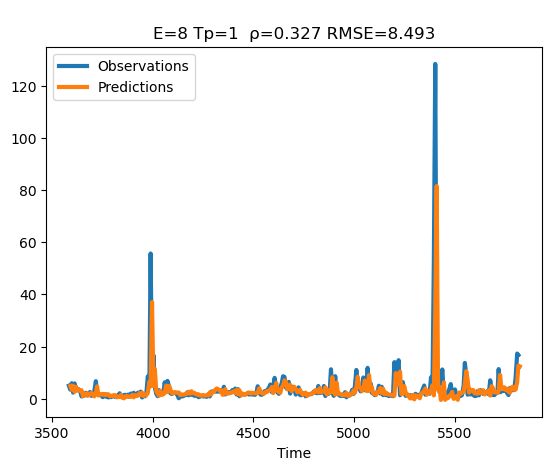

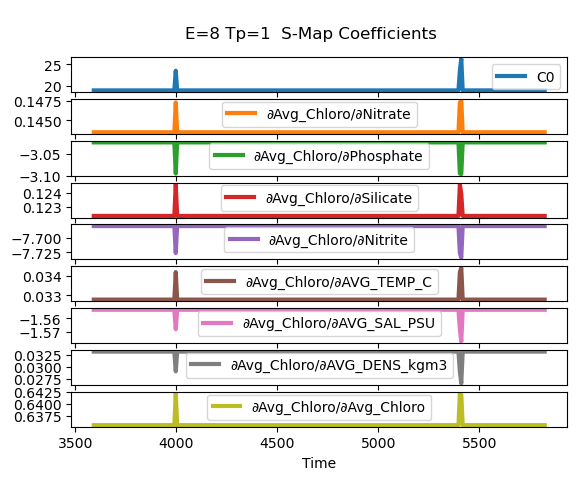

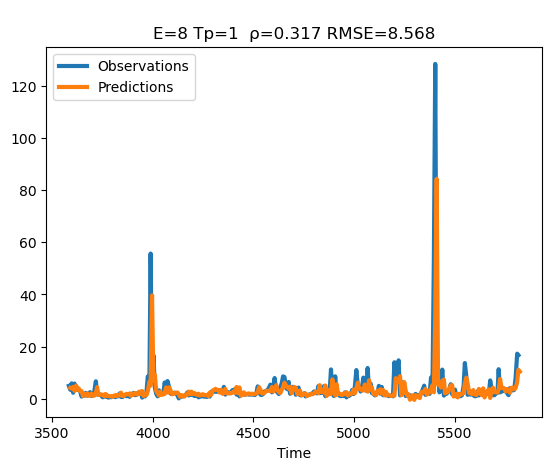

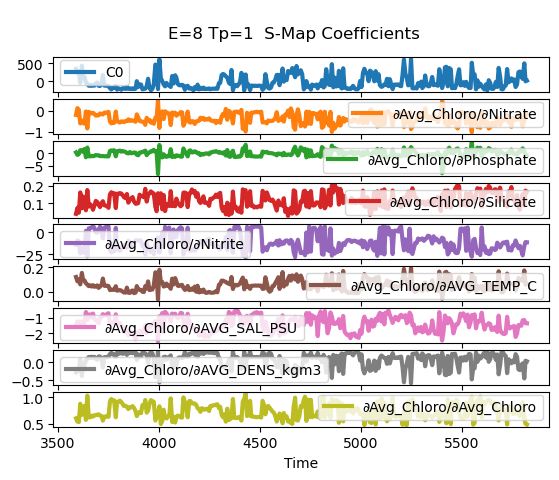

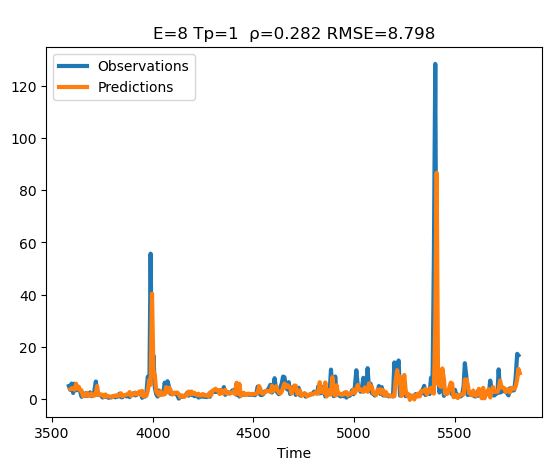

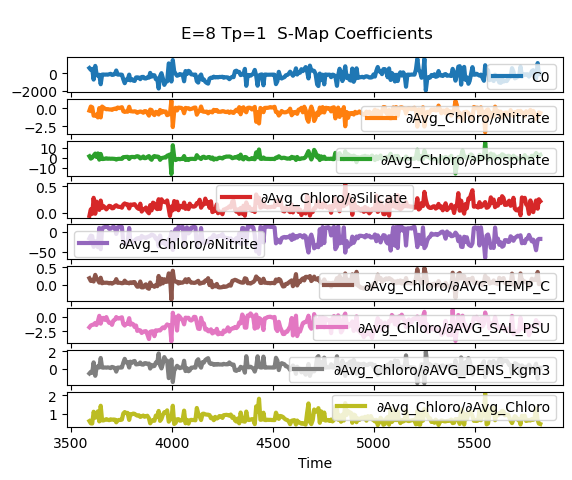

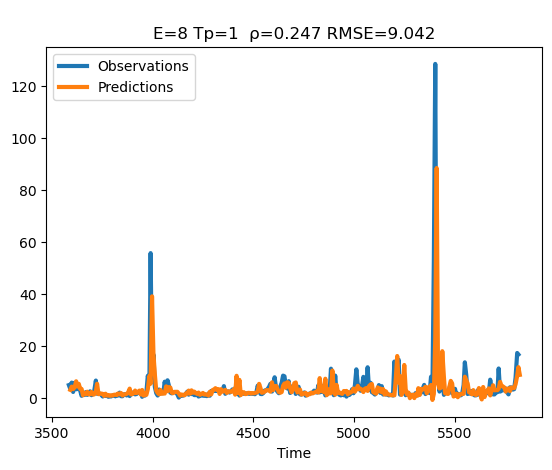

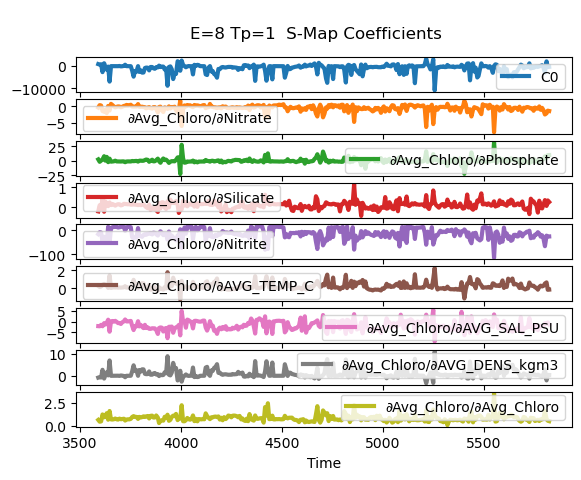

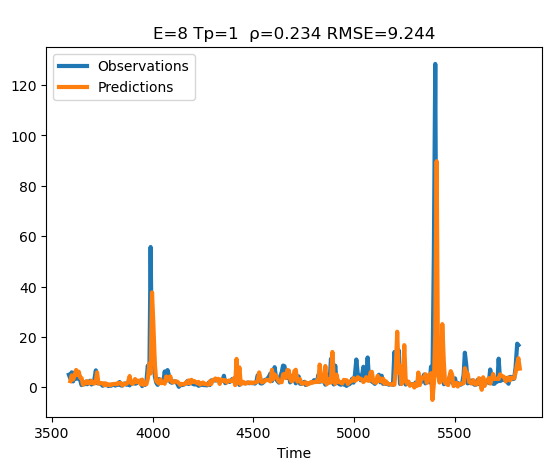

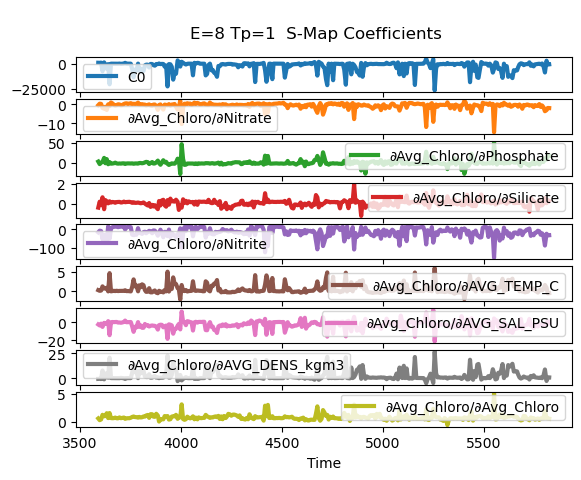

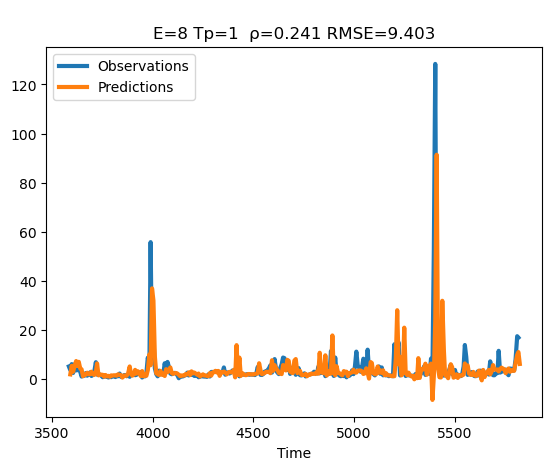

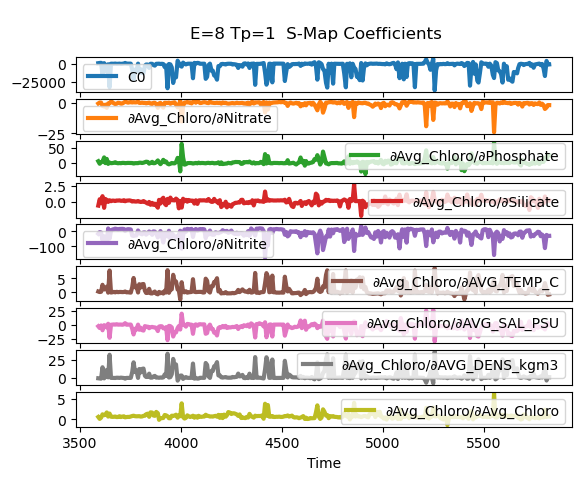

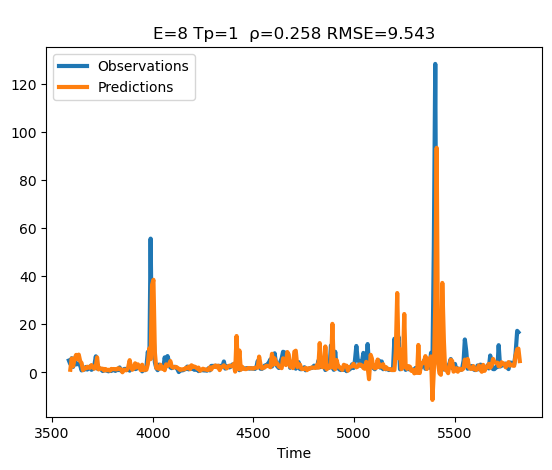

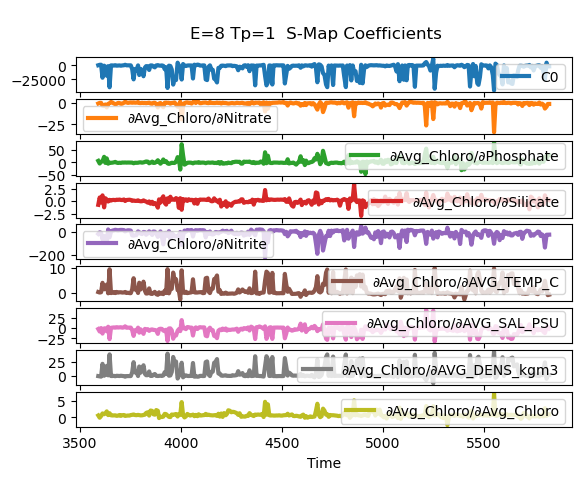

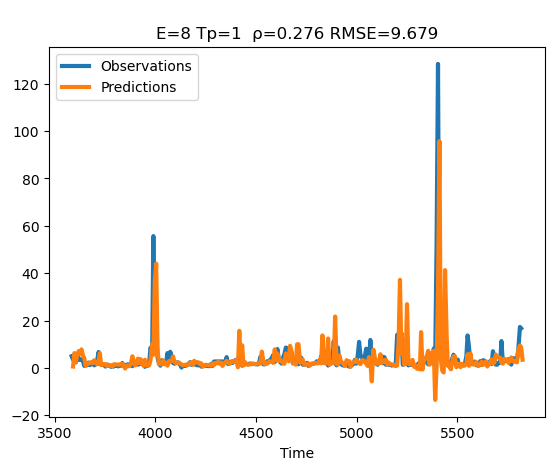

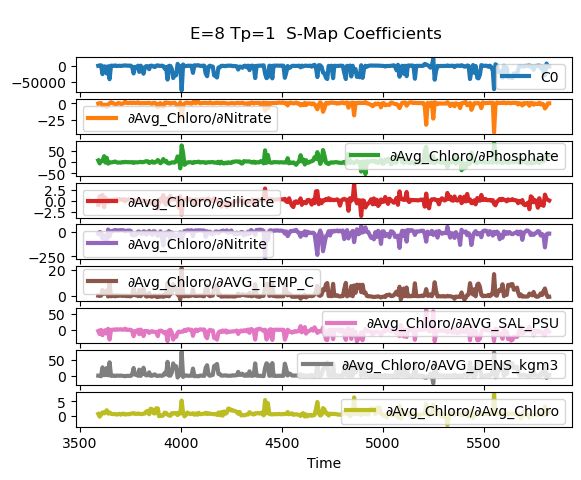

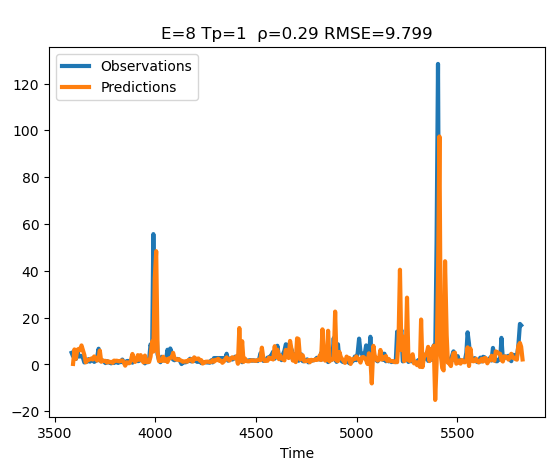

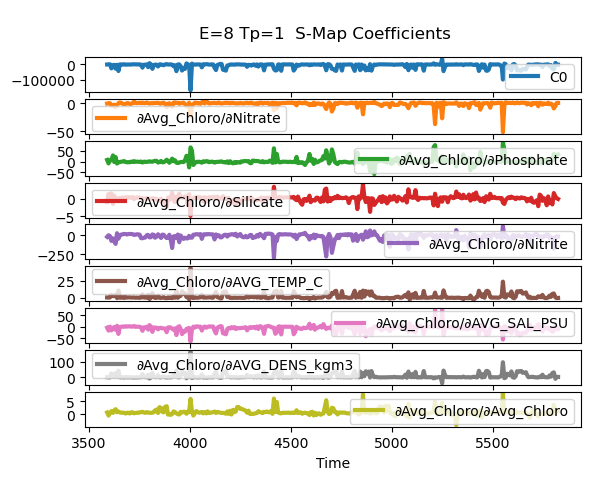

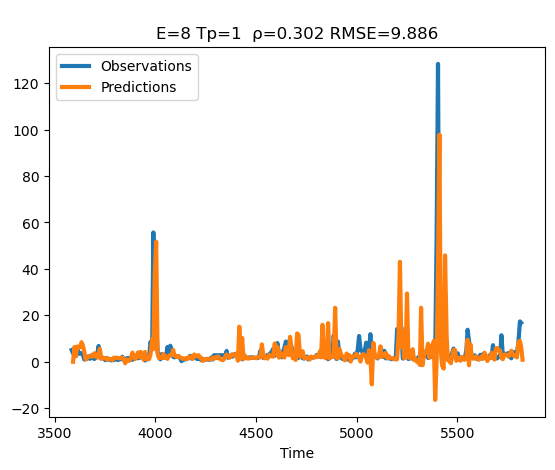

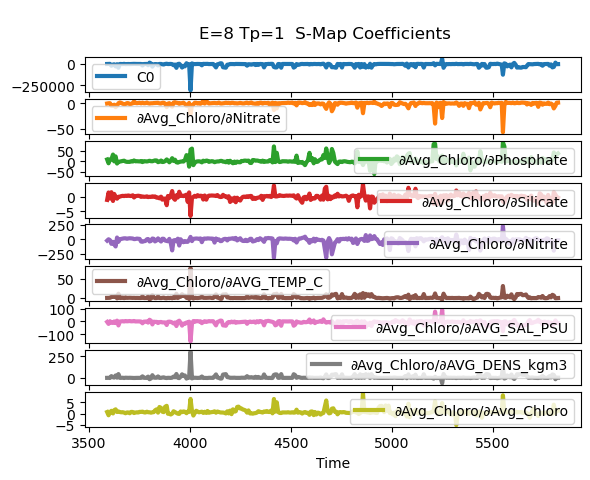

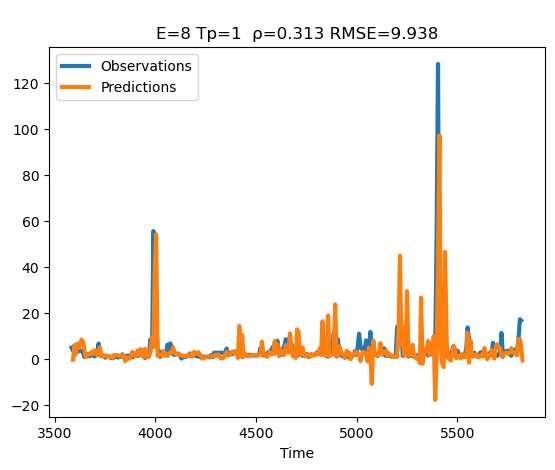

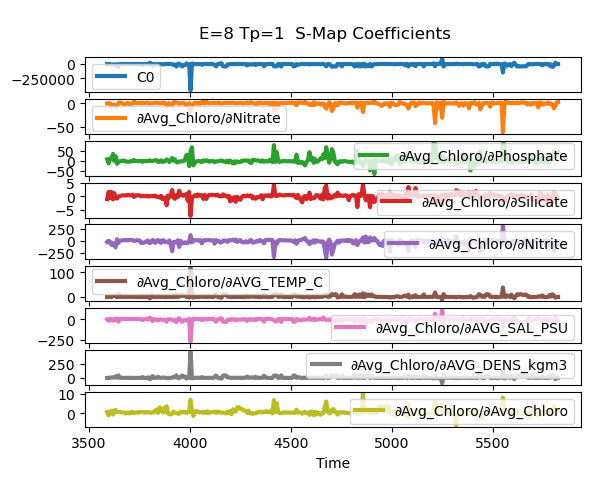

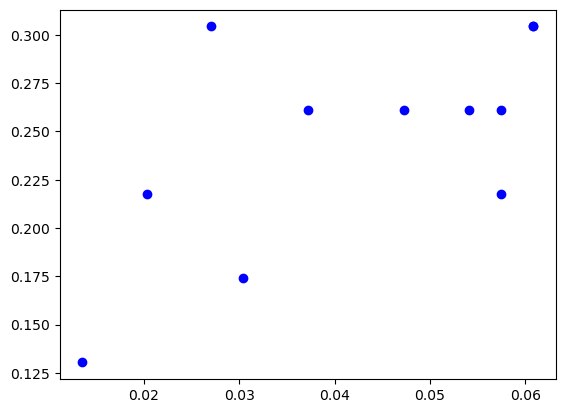

In [30]:
#Larger trial with different embeddings 
x = []
y = []
for i in range(0,11):
    result = edm.SMap(
    dataFrame = time_series, 
    columns = 'Nitrate Phosphate Silicate Nitrite AVG_TEMP_C AVG_SAL_PSU AVG_DENS_kgm3 Avg_Chloro',
    target = 'Avg_Chloro',
    lib = '1 512',  # Library from rows 0 to 700
    pred = '513 832',
    E = 8,
    tau=-1,
    theta=i,
    showPlot = True,
    embedded=True,
    ignoreNan = True
    )   
    cur_bloom = bloom_binary_prediction(result['predictions']['Observations'].iloc[1:-1],result['predictions']['Predictions'].iloc[1:-1])
    x.append(cur_bloom[2]) #False positive
    y.append(cur_bloom[1]) #True positive

plt.scatter(x, y, color='blue', label='Data Points')

In [31]:
result['predictions']['Observations'].iloc[1:]

1       3.47
2       5.91
3       2.32
4       5.84
5       3.37
       ...  
316     3.39
317     7.82
318    17.30
319    16.71
320      NaN
Name: Observations, Length: 320, dtype: float64

In [32]:
time_series

,Time,Nitrate,Phosphate,Silicate,Nitrite,AVG_TEMP_C,AVG_SAL_PSU,AVG_DENS_kgm3,Avg_Chloro
time (UTC),,,,,,,,,
0.0,0,0.43,0.24,5.6,0.03,18.10,33.695,1024.129374,1.82
7.0,7,0.83,0.37,5.1,0.04,17.35,33.640,1024.289049,2.71
13.0,13,0.45,0.24,3.5,0.00,20.25,33.660,1023.563298,0.99
20.0,20,0.34,0.17,4.2,0.00,9.90,33.650,1023.740812,1.23
28.0,28,0.29,0.12,3.8,0.00,11.25,33.710,1023.004896,2.41
...,...,...,...,...,...,...,...,...,...
5789.0,5789,0.85,0.30,6.2,0.00,17.40,33.470,1024.149572,3.22
5796.0,5796,0.45,0.25,4.9,0.00,17.90,33.475,1024.033476,3.39
5803.0,5803,0.00,0.17,5.2,0.00,17.35,33.545,1024.214172,7.82


In [33]:
y

[np.float64(0.17391304347826086),
 np.float64(0.13043478260869565),
 np.float64(0.21739130434782608),
 np.float64(0.30434782608695654),
 np.float64(0.2608695652173913),
 np.float64(0.2608695652173913),
 np.float64(0.2608695652173913),
 np.float64(0.2608695652173913),
 np.float64(0.21739130434782608),
 np.float64(0.30434782608695654),
 np.float64(0.30434782608695654)]

In [36]:
def transform_data(obs, pred, transform_type="none"):
    if transform_type == "none":
        return obs, pred
    elif transform_type == "minmax":
        scaler = MinMaxScaler()
        return scaler.fit_transform(obs.reshape(-1, 1)).flatten(), scaler.transform(pred.reshape(-1, 1)).flatten()
    elif transform_type == "standard":
        scaler = StandardScaler()
        return scaler.fit_transform(obs.reshape(-1, 1)).flatten(), scaler.transform(pred.reshape(-1, 1)).flatten()
    elif transform_type == "quantile":
        transformer = QuantileTransformer()
        return transformer.fit_transform(obs.reshape(-1, 1)).flatten(), transformer.transform(pred.reshape(-1, 1)).flatten()
    else:
        raise ValueError(f"Unknown transformation type: {transform_type}")
    

In [37]:
def train_evaluate_model(obs, pred, thresholds=[8.03199999999999, 7.5, 8.5], transforms=["none", "minmax", "standard"]):
    results = []
    
    for threshold in thresholds:
        for transform in transforms:
            # Apply transformations to the data
            transformed_obs, transformed_pred = transform_data(obs, pred, transform)
            
            # Evaluate performance
            result = bloom_binary_prediction(transformed_obs, transformed_pred, threshold)
            results.append((threshold, transform, result))
    
    return results